<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/WUSTL/CABI-Demand/demand_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Washington University [Olin School of Business](https://olin.wustl.edu/EN-US/Pages/default.aspx)
[Center for Analytics and Business Insights](https://olin.wustl.edu/EN-US/Faculty-Research/research-centers/center-analytics-business-insights/Pages/default.aspx) (CABI)  
[Deep Learning for Demand Forecasting](https://github.com/jeffheaton/present/tree/master/WUSTL/CABI-Demand)  
Copyright 2022 by [Jeff Heaton](https://www.youtube.com/c/HeatonResearch), Released under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) 

# Meta Prophet

Connect GDrive, to write out any results.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Read the provided tabular data CSVs.

In [2]:
import pandas as pd
import os

df_sales = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/sales_train.csv")
df_items = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/items.csv")
df_resturant = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/resturants.csv")

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 
df_sales['weekday'] = df_sales.date.dt.day_name()

start_date = df_sales.date.min()
df_sales['week'] = (((df_sales.date - start_date).dt.days)/7).astype(int)

Begin by producing a line graph of all sales over the provided 3-year timespan. We will use this to train Prophet.

In [3]:
import plotly.express as px

df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

Construct prophet and put the previous data into the form expected by prophet.

In [7]:
import pandas as pd
from prophet import Prophet

df_plot.columns = ['ds','y']

m = Prophet()
m.fit(df_plot)

Predict one year into the future.

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2022-12-27
1457,2022-12-28
1458,2022-12-29
1459,2022-12-30
1460,2022-12-31


Display the predicted tabular data.

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2022-12-27,373.552105,312.954798,436.441247
1457,2022-12-28,430.595682,374.850743,491.442827
1458,2022-12-29,613.722326,552.603213,674.341584
1459,2022-12-30,737.579760,675.805879,796.298890
1460,2022-12-31,738.579596,680.471265,797.503678


Plot the future predictions.

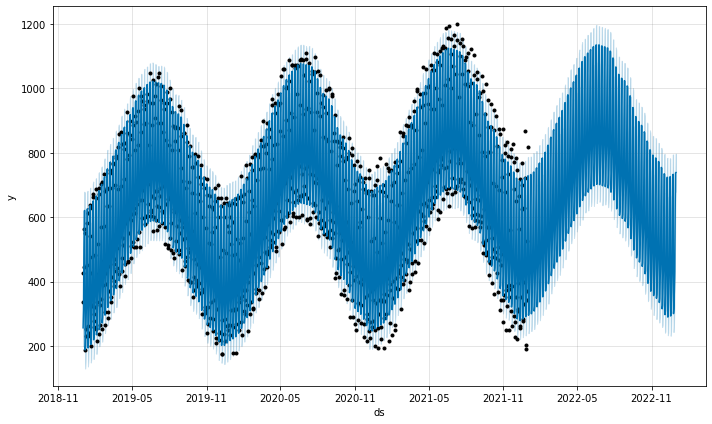

In [11]:
fig1 = m.plot(forecast)

See what seasonality and trend were detected.

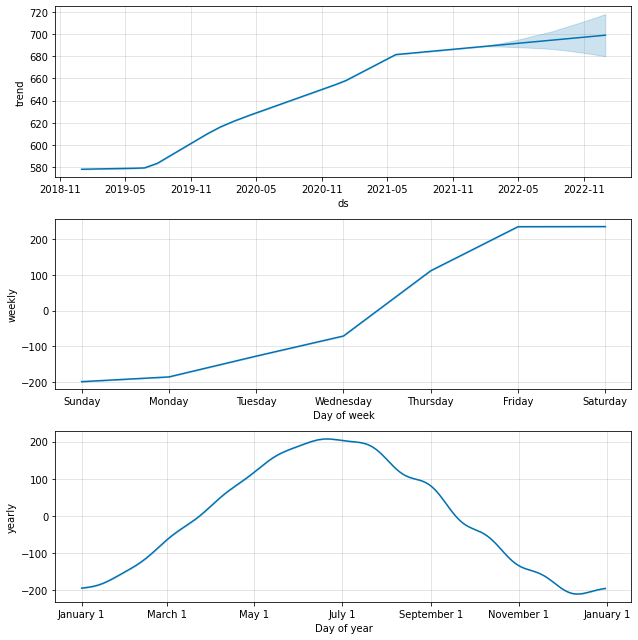

In [12]:
fig2 = m.plot_components(forecast)

Use Plotly to generate an interactive plot.

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)